In [1]:
## Import
from __future__ import print_function
from utils.dataset import BasicDataset
from utils.patient import Patient
import torch
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from unet.unet_model import UNet
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def bool_to_float(v):
    if v == True:
        return 1
    elif v == False:
        return 0
    else:
        return v

In [3]:
## Define Dataset

import os



imgpath = "C:/Users/brend/Data/autoseg/train/img/"
segpath = "C:/Users/brend/Data/autoseg/train/seg/"

fls = os.listdir(imgpath)

dataset = BasicDataset(imgpath,segpath,data_device='cuda' if torch.cuda.is_available() else 'cpu')



In [4]:
## Define Data Loader
batch_size = 5
loader = DataLoader(dataset,batch_size = batch_size)


In [5]:
## Parameters
n_channels = 1
n_classes = dataset.__nclass__()
lr = 0.001
wd = 1e-8
mm = 0.9
ep = 100


In [6]:
## Define Net
net = UNet(n_channels=n_channels, n_classes=n_classes+1)
net.to(device=dataset.dev)


UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, moment

In [7]:
## Set up Optimizer

optimizer = optim.RMSprop(net.parameters(),lr = lr, weight_decay = wd, momentum = mm)
critereon = nn.CrossEntropyLoss()    


In [8]:
## Train or Load

loadnet = False

if not loadnet:

    for epoch in range(ep):
        net.train()
        epoch_loss = 0
        for batch in loader:
            imgs = batch['img']
            segs_gt = batch['seg']

            imgs = imgs.to(device=dataset.dev, dtype=torch.float32)
            segs_gt = segs_gt.to(device=dataset.dev, dtype = torch.long)

            segs_pr = net(imgs)

            loss = critereon(segs_pr,segs_gt)
            epoch_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_value_(net.parameters(),0.1)
            optimizer.step()

            print(str(loss))
else:
    loadfile = "C:/Users/brend/Data/autoseg/unet-save.pth"
    net.load_state_dict(torch.load(loadfile, map_location=dataset.dev))


tensor(2.5622, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(2.3579, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(1.5239, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(1.0567, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.7917, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.6363, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.6130, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.6173, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.6617, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.5615, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.5662, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.5578, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.4969, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.4943, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.4855, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.4695, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.5488, device='c

tensor(0.1320, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1586, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1835, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1415, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1591, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1753, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1984, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1610, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1404, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1279, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1606, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.2161, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1366, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1700, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1875, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.2108, device='c

tensor(0.0821, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1084, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1237, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0870, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0842, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1056, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1223, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1074, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0822, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0757, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1015, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1343, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0965, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1107, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1199, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0929, device='c

tensor(0.0741, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1276, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1138, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0828, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0809, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1061, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1230, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0872, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0826, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0701, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0928, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1165, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0916, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0816, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1008, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1037, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0932, device='c

tensor(0.0511, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0610, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0721, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0567, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0466, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0684, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0653, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0657, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0569, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0521, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0696, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0740, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0577, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0597, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0808, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0757, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0683, device='c

tensor(0.0470, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0542, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0600, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0509, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0452, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0612, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0601, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0505, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0500, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0506, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0571, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0593, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0472, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0423, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0575, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0642, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0492, device='c

tensor(0.0682, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0944, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1334, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0824, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1085, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1304, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1123, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0991, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0789, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1165, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1081, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0735, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1272, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.0916, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1041, device='cuda:0', grad_fn=<NllLoss2DBackward>)
tensor(0.1032, device='c

In [10]:
## Save Net
savefile = "C:/Users/brend/Data/autoseg/unet-save.pth"
torch.save(net.state_dict(),savefile)

C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


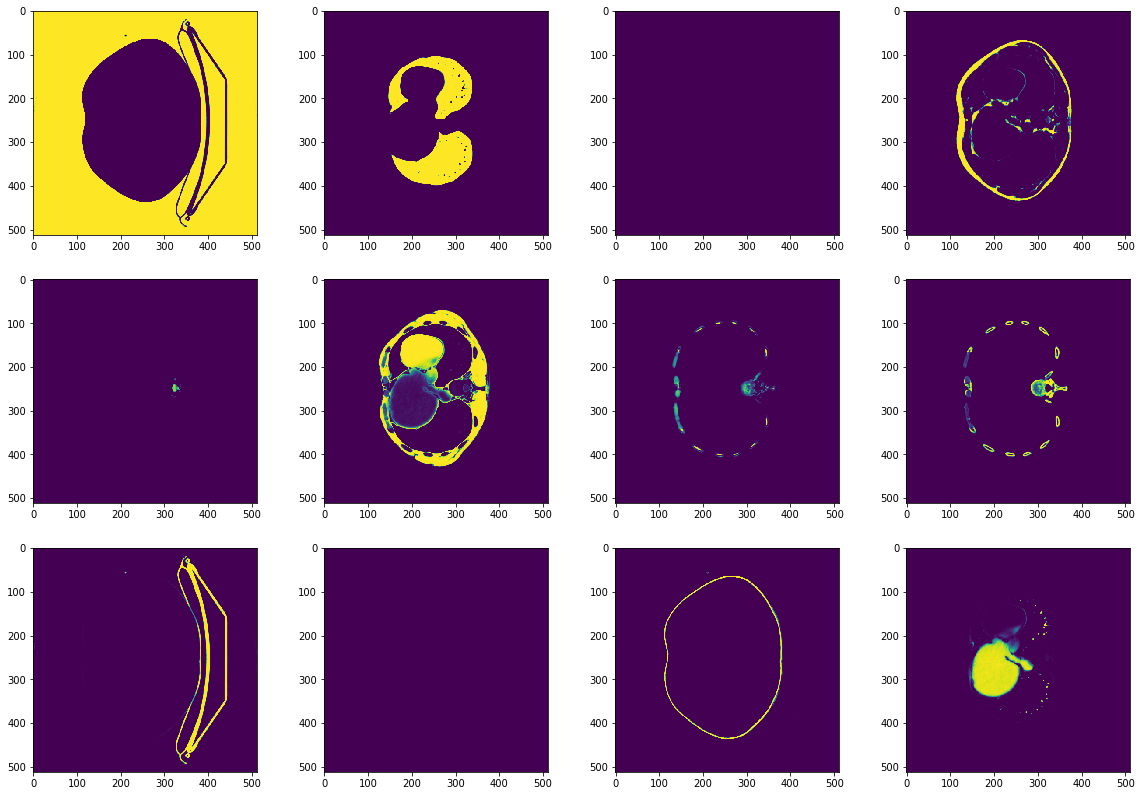

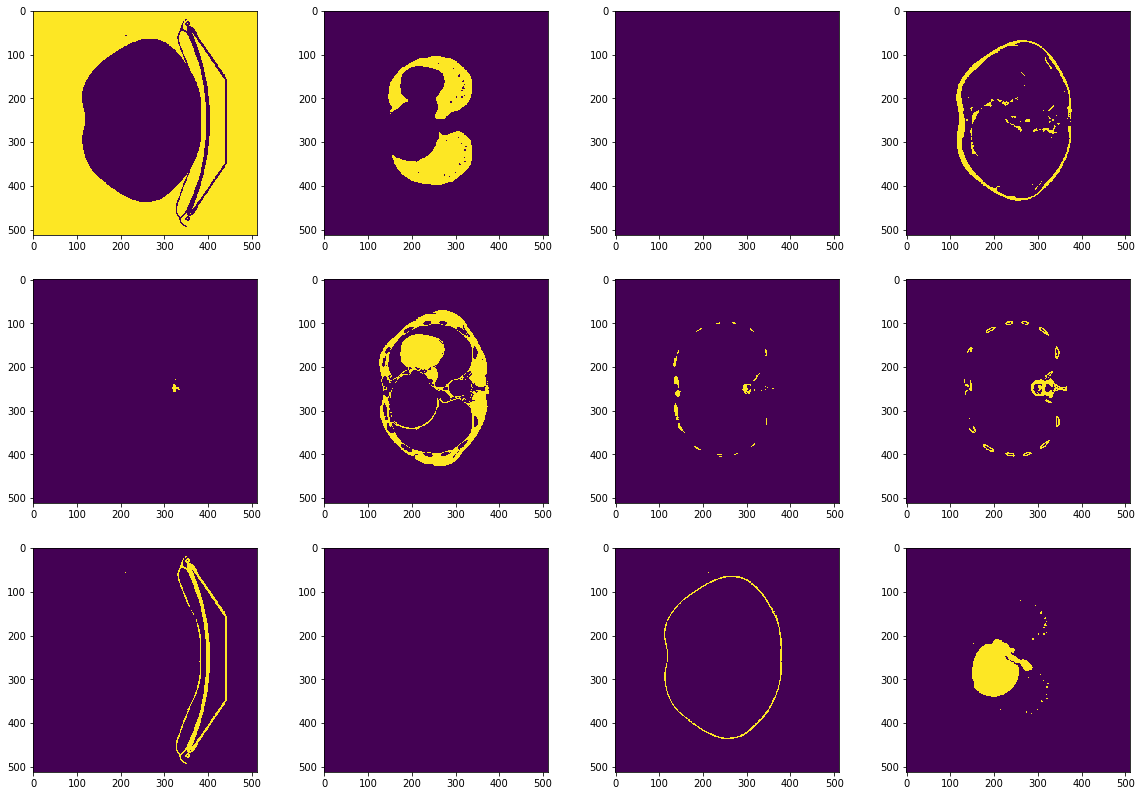

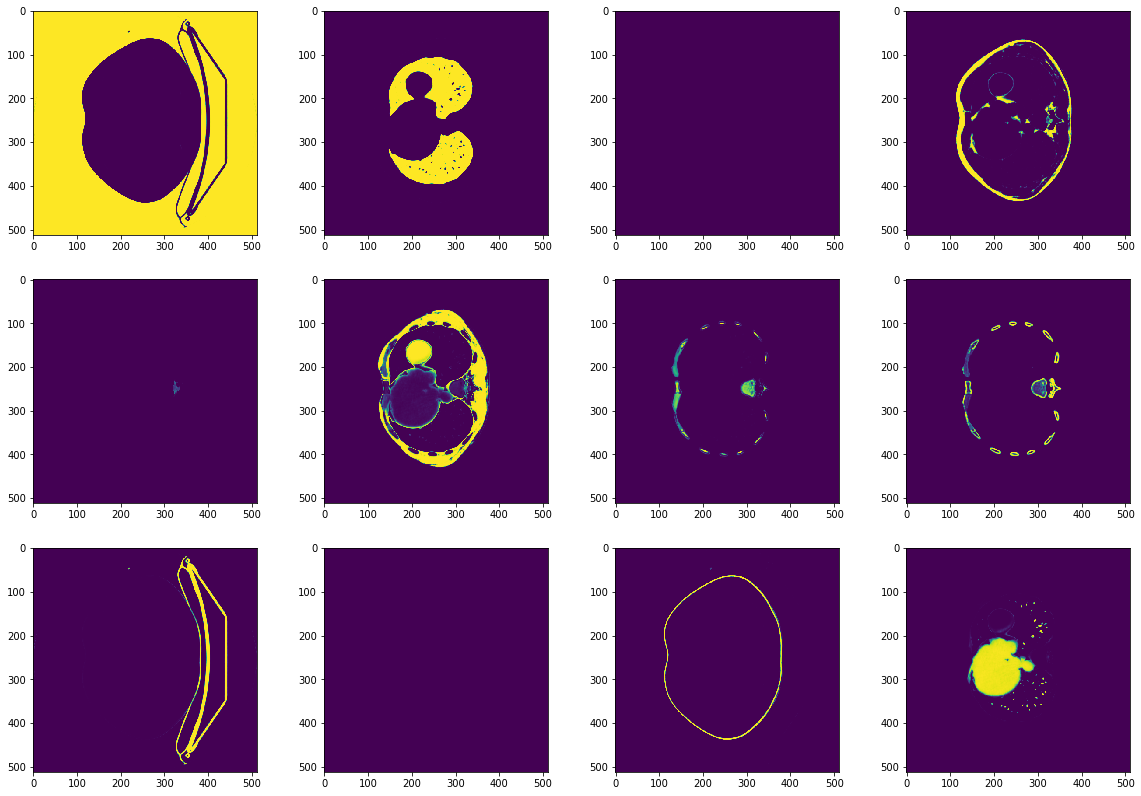

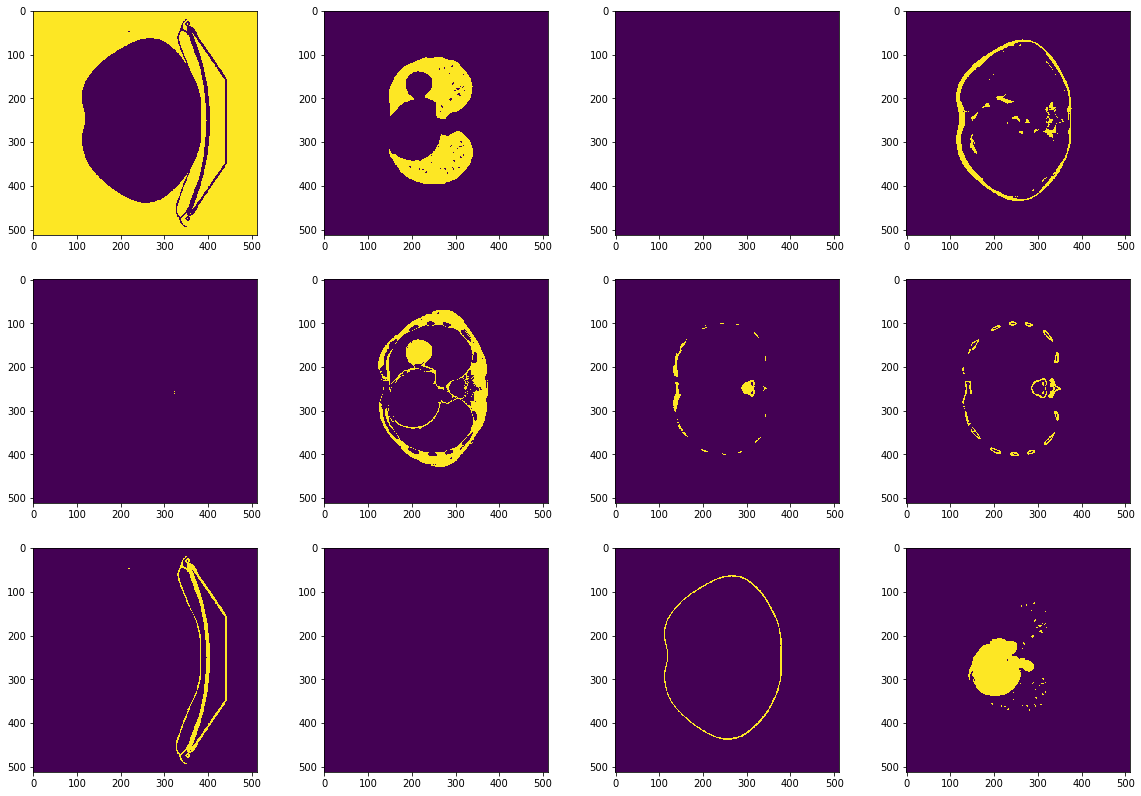

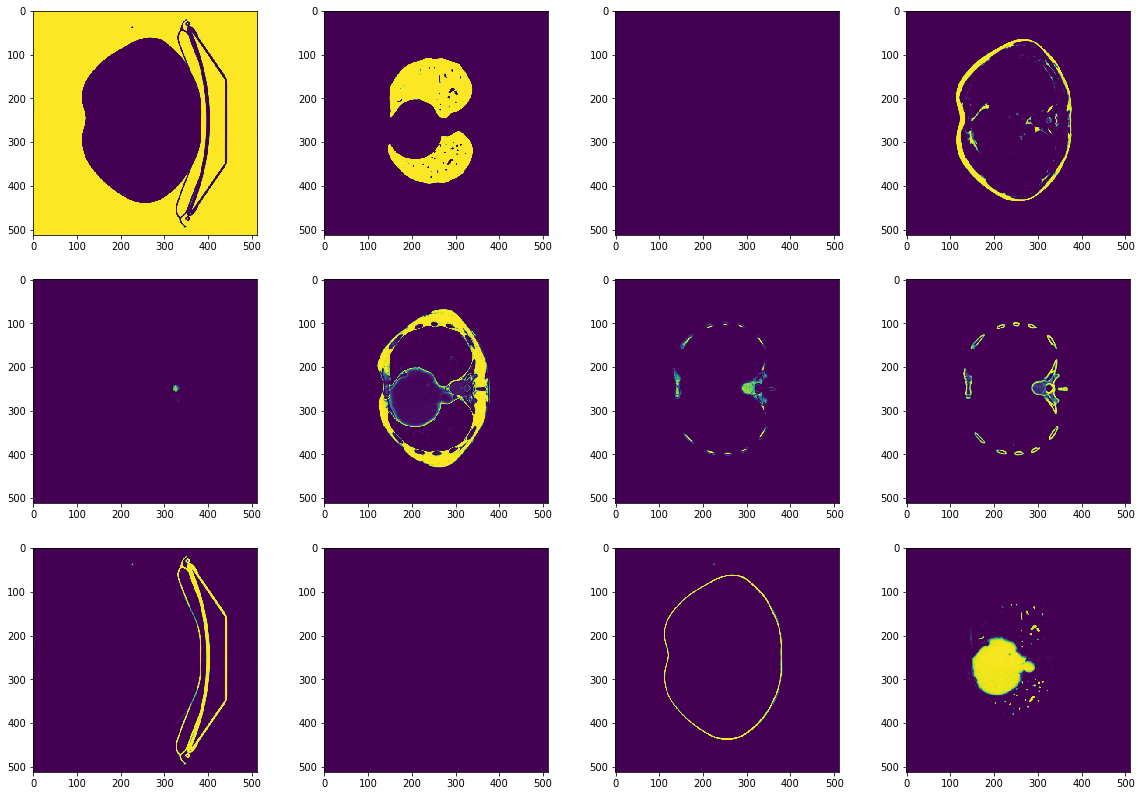

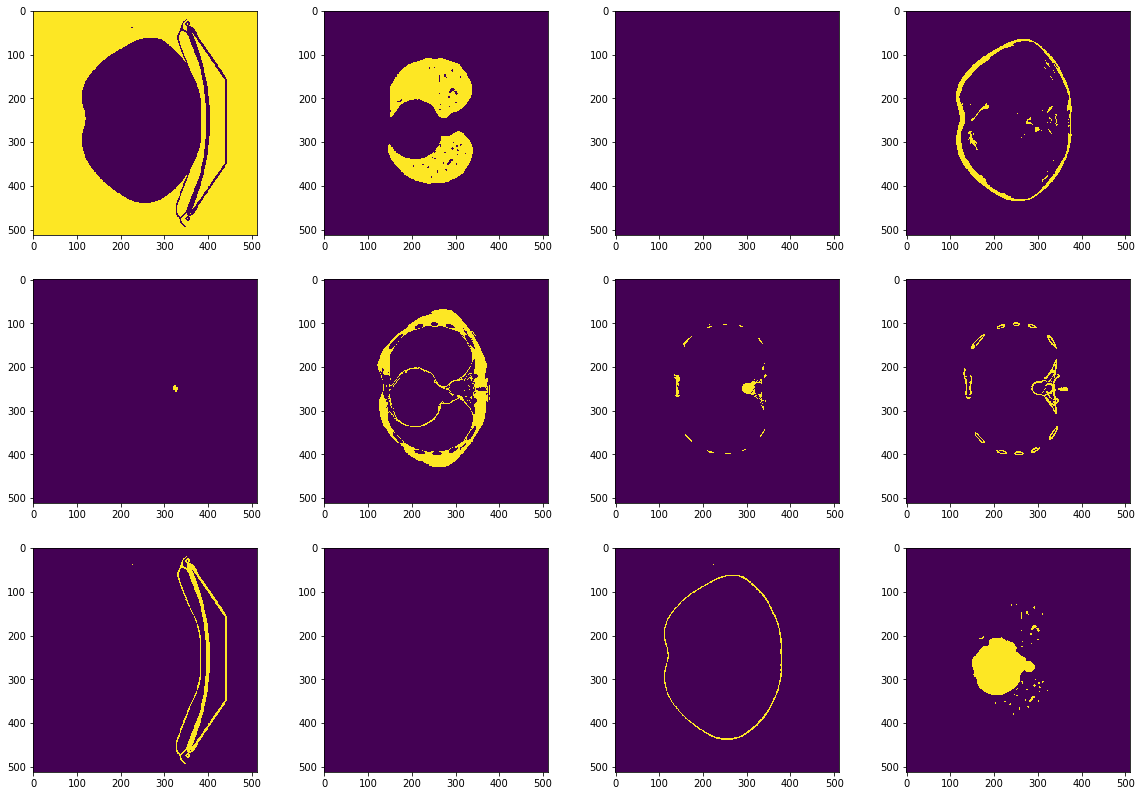

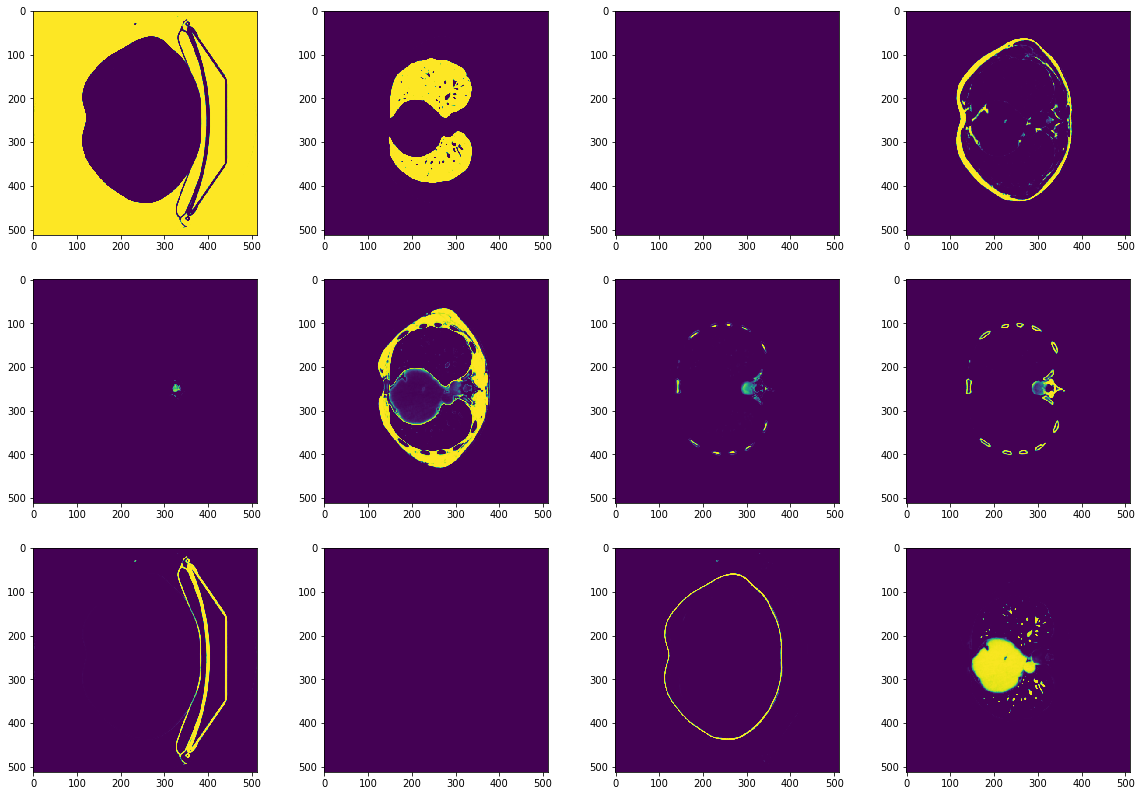

Error in callback <function flush_figures at 0x000001D8BFE97828> (for post_execute):


KeyboardInterrupt: 

In [11]:
## Probability maps
net.eval()

testloader = DataLoader(dataset,batch_size=1)

for testbatch in testloader:
    testimgs, testsegs_gt = testbatch['img'],testbatch['seg']
    
    with torch.no_grad():
        testsegs_pr = net(testimgs)
    testsegs_pr = torch.softmax(testsegs_pr,dim=1)
    _,testsegs_cl = torch.max(testsegs_pr,dim=1)
    testsegs_pr = testsegs_pr.to(device='cpu')
    testsegs_cl = testsegs_cl.to(device='cpu')
    fig1,ax1 = plt.subplots(3,4)
    fig1.set_figwidth(20)
    fig1.set_figheight(14)
    for axInd in range(n_classes):        
        if axInd < 4:
            ax1[0,axInd%4].imshow(testsegs_pr[0,axInd+1,:,:].numpy(),vmin = 0, vmax = 1)
        elif axInd < 8:
            ax1[1,axInd%4].imshow(testsegs_pr[0,axInd+1,:,:].numpy(),vmin = 0, vmax = 1)
        else:
            ax1[2,axInd%4].imshow(testsegs_pr[0,axInd+1,:,:].numpy(),vmin = 0, vmax = 1)
            
    fig2,ax2 = plt.subplots(3,4)
    fig2.set_figwidth(20)
    fig2.set_figheight(14)
    for axInd in range(n_classes):
#         X = (testsegs_cl[0,:,:].numpy()>(axInd+1-0.1) & testsegs_cl[0,:,:].numpy()<(axInd+1+0.1))
        X = testsegs_cl[0,:,:].numpy() == (axInd+1)
        X = X.astype(np.float)
        if axInd < 4:
            ax2[0,axInd%4].imshow(X,vmin = 0, vmax = 1)
        elif axInd < 8:
            ax2[1,axInd%4].imshow(X,vmin = 0, vmax = 1)
        else:
            ax2[2,axInd%4].imshow(X,vmin = 0, vmax = 1)

        

In [ ]:
## Test Net on Training Data

net.eval()

tot = 0

testloader = DataLoader(dataset,batch_size=1)

for testbatch in testloader:
    testimgs, testsegs_gt = testbatch['img'],testbatch['seg']
    
    with torch.no_grad():
        testsegs_pr = net(testimgs)
    
    _,testsegs_cl = torch.max(testsegs_pr,dim=1)
    
    testimgs = testimgs.to(device='cpu')
    testsegs_gt = testsegs_gt.to(device='cpu')
    testsegs_cl = testsegs_cl.to(device='cpu')
    
    fig, ax = plt.subplots(1, 3)
    fig.set_figwidth(15)
    ax[0].imshow(testimgs[0,0,:,:].numpy(),vmin = -1000, vmax=1000)
    ax[1].imshow(testsegs_gt[0,:,:].numpy(),vmin = 0, vmax = 12)
    ax[2].imshow(testsegs_cl[0,:,:].numpy(),vmin = 0, vmax = 12)
    plt.show(fig)
    
    plt.show(fig)
    time.sleep(0.01)



In [ ]:
## Load Patient and Predict

# pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1901281601/img-nii/CTCAC1901281601.nii.gz"
# seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1901281601/s04-nii/CTCAC1901281601.nii.gz"

# pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1901281608/img-nii/CTCAC1901281608.nii.gz"
# seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1901281608/s04-nii/CTCAC1901281608.nii.gz"

# pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1903181826/img-nii/CTCAC1903181826.nii.gz"
# seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1903181826/s04-nii/CTCAC1903181826.nii.gz"

# pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906061647/img-nii/CTCAC1906061647.nii.gz"
# seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906061647/s04-nii/CTCAC1906061647.nii.gz"

# pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906071329/img-nii/CTCAC1906071329.nii.gz"
# seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906071329/s04-nii/CTCAC1906071329.nii.gz"

pat_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906071741/img-nii/CTCAC1906071741.nii.gz"
seg_file = "/Data/ContijochLab/projects/autoseg/predict/CTCAC1906071741/s04-nii/CTCAC1906071741.nii.gz"

patient = Patient(pat_file,data_device='cuda' if torch.cuda.is_available() else 'cpu')

patient.predict(net,seg_file,batch_size=5)

In [ ]:
float(True)